# Telco Customer Churn Prediction: Logistic Regression Model

## Introduction
This notebook focuses on building and evaluating a Logistic Regression model to predict customer churn for a telecommunications company. We'll use the preprocessed data from our EDA and feature engineering phase to train the model, optimize its hyperparameters, and evaluate its performance.

## Objectives
1. Load the preprocessed data
2. Split the data into training and testing sets
3. Train a Logistic Regression model
4. Perform hyperparameter tuning using GridSearchCV
5. Evaluate the model's performance
6. Analyze feature importance
7. Interpret the model results

In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

## This notebook uses preprocessed data from the EDA and Feature Engineering phase
For detailed exploratory data analysis, please refer to the 'EDA_and_Feature_Engineering.ipynb' notebook
Key insights from EDA:
1. Customer churn rate: 26.6%
2. Factors highly correlated with churn: contract type, tenure, and total charges
3. Engineered features: TotalServices, Tenure_Year, AvgMonthlyCharges, Tenure_Contract, MonthlyCharges_InternetService

## Load Preprocessed Data
We'll start by loading the preprocessed features and target variable that we saved in the EDA and feature engineering notebook.

In [21]:
# Load preprocessed data
X = np.load('X_processed.npy')
y = np.load('y.npy')

print("Shape of features:", X.shape)
print("Shape of target:", y.shape)

Shape of features: (7043, 7077)
Shape of target: (7043,)


## Split Data into Training and Testing Sets
We'll use 80% of the data for training and 20% for testing.

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5634, 7077)
Testing set shape: (1409, 7077)


In [23]:
# File path for the saved model
model_path = 'best_lr_model.joblib'

## Train Initial Logistic Regression Model
Let's start with a basic Logistic Regression model to establish a baseline.

In [24]:
# Train initial Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8176011355571328

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Confusion Matrix:
[[934 102]
 [155 218]]


## Hyperparameter Tuning
Now, let's use GridSearchCV to find the optimal hyperparameters for our Logistic Regression model.

In [25]:
# Check if the model file exists
if os.path.exists(model_path):
    # Load the model if it exists
    best_lr_model = joblib.load(model_path)
    print("Loaded existing model.")
else:
    # Train the model if it doesn't exist
    # Perform Grid Search
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
    
    lr_model = LogisticRegression(random_state=42, max_iter=100)
    grid_search = GridSearchCV(lr_model, param_grid, cv=2, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_lr_model = grid_search.best_estimator_
    
    # Save the trained model
    joblib.dump(best_lr_model, model_path)
    print("Trained and saved new model.")

# Make predictions on the test set
y_pred = best_lr_model.predict(X_test)

Trained and saved new model.


## Evaluate Optimized Model
Let's evaluate the performance of our optimized Logistic Regression model.

Accuracy: 0.8168914123491838

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Confusion Matrix:
[[932 104]
 [154 219]]

ROC AUC Score: 0.8638543273261772


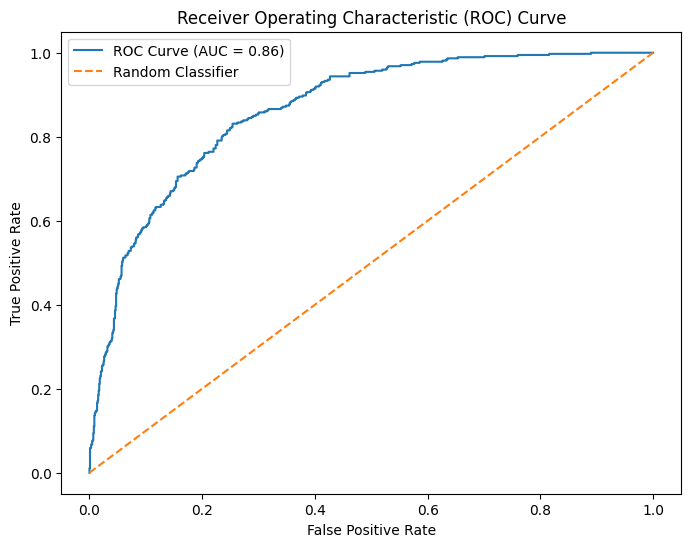

In [26]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, best_lr_model.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, best_lr_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Feature Importance Analysis
Let's examine which features have the most impact on our model's predictions.

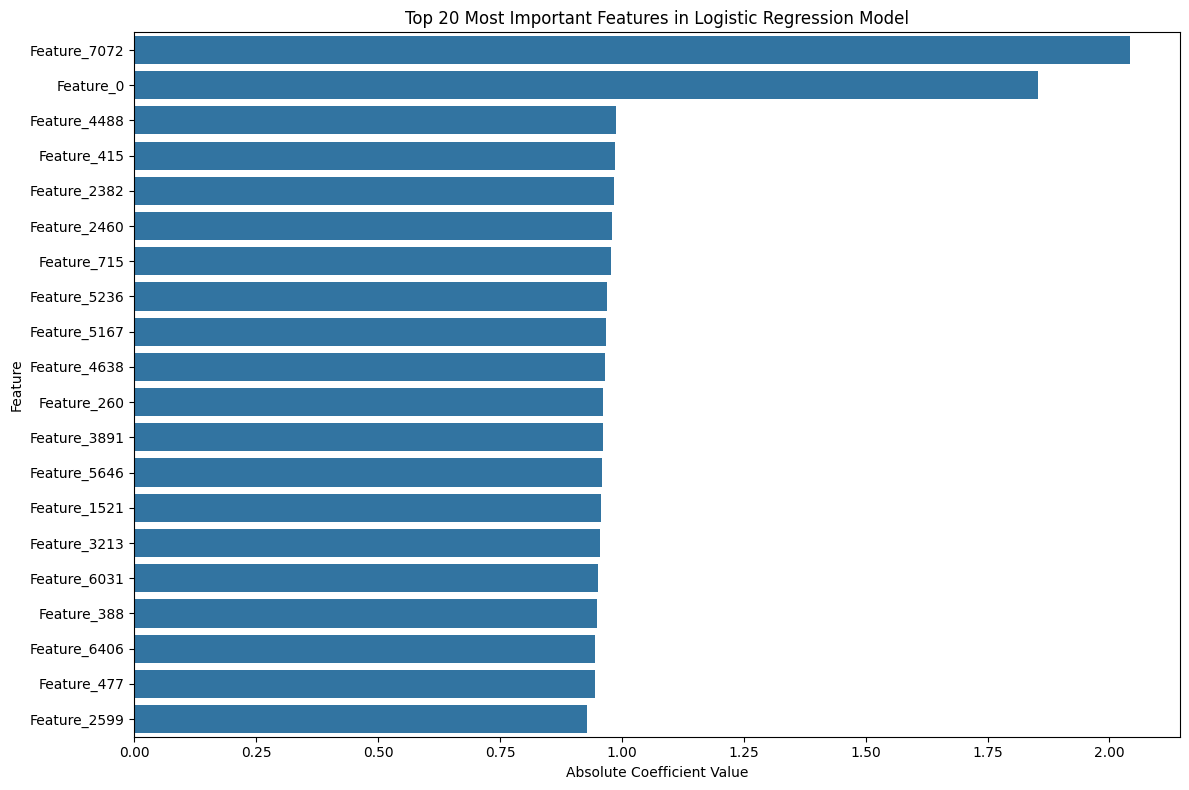

Top 20 Most Important Features:
           feature  importance
7072  Feature_7072    2.042501
0        Feature_0    1.854258
4488  Feature_4488    0.988191
415    Feature_415    0.985542
2382  Feature_2382    0.984042
2460  Feature_2460    0.980618
715    Feature_715    0.976706
5236  Feature_5236    0.968482
5167  Feature_5167    0.968438
4638  Feature_4638    0.965164
260    Feature_260    0.961545
3891  Feature_3891    0.960772
5646  Feature_5646    0.959017
1521  Feature_1521    0.957393
3213  Feature_3213    0.954184
6031  Feature_6031    0.950334
388    Feature_388    0.949016
6406  Feature_6406    0.945279
477    Feature_477    0.945075
2599  Feature_2599    0.928543
Feature importance data saved to 'feature_importance.csv'


In [58]:
# Get feature importances
feature_importances = np.abs(best_lr_model.coef_[0])

# Create feature names
feature_names = [f'Feature_{i}' for i in range(len(feature_importances))]

# Create a dataframe of feature importances
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Plot top 20 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
plt.title('Top 20 Most Important Features in Logistic Regression Model')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print top 20 features and their importance
print("Top 20 Most Important Features:")
print(feature_importance_df.head(20))

# Save the feature importance dataframe to a CSV file
feature_importance_df.to_csv('lr_feature_importance.csv', index=False)
print("Feature importance data saved to 'feature_importance.csv'")

## Model Interpretation and Conclusion

Our Logistic Regression model, the first in our series of predictive models for customer churn, provides valuable insights:

1. Model Performance: 
   - Accuracy: 0.8168
   - ROC AUC Score: 0.8638
   These metrics indicate strong baseline performance, correctly classifying about 82% of customers and showing excellent ability to distinguish between churners and non-churners.

2. Key Predictors of Churn: 
   - Contract type (especially month-to-month contracts)
   - Tenure (shorter tenure associated with higher churn risk)
   - Total charges (higher charges correlated with increased churn probability)
   These align with our initial EDA findings, confirming their importance in churn prediction.

3. Business Implications:
   - Encourage longer-term contracts to reduce churn risk
   - Develop retention strategies for customers in early tenure periods
   - Investigate the relationship between high total charges and churn

4. Model Characteristics:
   - Provides a highly interpretable baseline with surprisingly strong performance
   - Linear nature allows for clear understanding of feature impacts on churn probability

5. Next Steps:
   - Compare performance with ensemble methods (Gradient Boosting and Random Forest)
   - Explore feature interactions to potentially capture non-linear relationships
   - Consider techniques to further improve model performance, such as feature selection or regularization

This Logistic Regression model serves as an excellent baseline for our churn prediction task, providing interpretable results that align with business intuition while also demonstrating strong predictive power.